<a href="https://colab.research.google.com/github/caropilardiaz/Mentoria-Imagenes_Drones/blob/master/5_Pr%C3%A1cticoANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Diplomatura en Ciencias de Datos, Aprendizaje Automático y sus Aplicaciones**#


##**Mentoría Diplomatura en Ciencia de Datos 2020**##

###**"Detección del desarrollo del cultivo con imágenes de Drones"**##


**Mentora: Carolina Del Pilar Díaz**


**Aprendizaje No Automático**


###Introducción

En la siguiente notebook se presentará la consigna a seguir para el quinto y último práctico del proyecto, correspondiente a la materia Aprendizaje Automático No Supervisado. El objetivo consiste en aplicar distintas técnicas de análisis exploratorio de datos al dataset, de modo de encontrar patrones sistematizables. Es decir que, a los fines de este práctico, por un momento nos olvidaremos de nuestro problema original de clasificación múltiple y de que tenemos datos etiquetados con sus respectivas clases.

Luego, una vez aplicadas las técnicas de aprendizaje no supervisado y del cálculo de las métricas pertinentes, podremos recurrir a las etiquetas de clases con el fin de contrastar los resultados obtenidos.

A pesar de que no serán utilizadas las etiquetas en una primera instancia, será importante evaluar el desbalance de clases y qué decisiones tomarán al respecto.

###Importaciones

In [1]:
#Importamos las librerías necesarias
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import os

# import sklearn as skl

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.decomposition.pca import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split

random_state = 0
np.random.seed(0)  # Para mayor determinismo

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.



In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

In [ ]:
###Consignas

#1.Preprocesamiento#

1.1 **Carga Dataset**

Inicialmente con el objetivo de obtener el dataset para los algoritmos de ANS, deberán cargar el dataset original conjunto( incluídas features climáticas)

In [ ]:
#dfa = pd.read_csv('Dron1.csv',decimal=".",sep=",",index_col=['ID '])

#dfc = pd.read_csv('ClimaReporte_2018.csv',decimal=".",sep=",",index_col=['Fecha'])

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
DATA_DIRECTORY = "/content/drive/My Drive/Colab Notebooks/Diplo Famaf/Mentoria/"
dfa = pd.read_csv(os.path.join(DATA_DIRECTORY,'Dron1.csv'),decimal=".",sep=",",index_col=['ID '])
dfc = pd.read_csv(os.path.join(DATA_DIRECTORY,'ClimaReporte_2018.csv'),decimal=".",sep=",",index_col=['Fecha'])

1.2 **Curación**

Aplicar Script de curación obtenido en el práctico 2

In [7]:
import sys 
sys.path.append(os.path.abspath("/content/drive/My Drive/Colab Notebooks/Diplo Famaf/Mentoria/"))
from curacion_dataset import curacion_dataset

dff = curacion_dataset(dfa,dfc)
dff.Fecha = dff['Fecha'].apply(lambda x: x.strftime('%Y-%m-%d')).str.replace('-','').astype(int)
dff.Fecha_de_espigazon = dff['Fecha_de_espigazon'].apply(lambda x: x.strftime('%Y-%m-%d')).str.replace('-','').astype(int)

Cantidad de filas repetidas en dataset drone (con el mismo contenido):  0

Cantidad de filas repetidas en dataset clima (con el mismo contenido):  0

Transformacion de columnas fechas a datatime

Eliminacion de caracteres raros de las columnas del dataset Dron
Eliminacion de caracteres raros de las columnas del dataset Clima

Chequeo de valores nulos

Aplicando codificacion de variables

Aplicando tests de integridad
Test Cantidad de Siembras: EXITOSO
Test Fecha de Madurez: ERROR
Test Fecha de Espigazon: ERROR
Test Cantidad de Repeticiones: EXITOSO
Test Cantidad de Genotipos: ERROR
Test Cantidad de dias entre Madurez y Espigazon: ERROR
Test relacion Enfermedad vs Rendimiento: ERROR

Correccion de las inconsistencias en las fechas de madurez

Correccion de las inconsistencias en las fechas de espigazon

Correccion de inconsistencias en variable Variedad

Correccion de inconsistencias en variable dias_entre_fechas


Aplicando tests de integridad
Test Cantidad de Siembras: EXITOSO
Test Fe

1.3 **Análisis del Balance de Clases**

En una primera instancia, podemos dejar que los algoritmos identifiquen patrones, sin necesidad de preocuparnos por el balance de clases.

En una etapa posterior, y aprovechando que tenemos las etiquetas, aplicarán los mismos algoritmos pero considerando el desbalance de clases en el dataset. Para ello, usar el parámetro sample_weight de k_means. Obtener conclusiones entre ambos resultados.

1.4 **Multicolinealidad Exacta**

Las variables explicativas no deben estar muy correlacionadas entre ellas, ya que la variabilidad de una y otra estarán explicando la misma parte de variabilidad de la variable dependiente. Esto es lo que se conoce como multicolinealidad, lo cual deriva en la imposibilidad de estimar los parámetros cuando la misma es exacta o en estimaciones muy imprecisas cuando la misma es aproximada. 

Dada la particularidad de nuestro dataset, deberían incorporar aquellas que posean la menor cantidad de multicolinealidad en la medida de lo posible (es muy difícil desestimar los índices) pero si podríamos desestimar peso de grano por ejemplo sólo aquellas que sean muy evidentes.

1.5 **Creación de nuevos atributos**

En esta etapa, pueden adicionar atributos calculados a partir de los datos preexistentes, que crean que son pertinentes a priori o que hayan encontrado interesantes por tener mayor correlación con la variable Target. Por ejemplo, una variable que represente las modas de las variedades por parcelas, el cuadrado de los días entre fechas, entre otras las que les parezca que de importancia

 1.6  **Normalización de Atributos**

Estandarizar el dataset usando alguna de las técnicas vistas en clase para variables continuas dado que los algoritmos de clasificación no supervisada lo requieren. Aplicar al dataset la normalización de atributos que consideren adecuada.

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

1.7 **Mezcla Aleatoria**

Finalmente, es recomendable que mezclen los datos aleatoriamente, dado que la inicialización influye en los resultados del modelo que se propone que implementen.



#2.Aprendizaje no Supervisado#

Una vez finalizada la etapa de preprocesamiento, se propone implementar, por un lado, una técnica de reducción de dimensionalidad para representar los datos y, por el otro, una técnica de clusterización.

2.1 **PCA**

 DescomposiCión de Variables: Principal Component Analysis.A partir del análisis y la visualización de los datasets transformados por PCA, obtener conclusiones.

2.2 **K-MEANS CLUSTERING**

Aplicar K-Means tanto al dataset originales.

Explorar distintas soluciones de clustering con diferentes parámetros, como iteraciones, número de clusters o métricas de distancia, y compararlas. Finalmente, para el modelo seleccionado:

Calcular las métricas pertinentes sobre los clusters resultantes.

Aplicando el método de Elbow, ¿cuál sería la cantidad óptima de clusters?

Agregar a los dataset originales el cluster resultante de los modelos.

Graficar diferentes variables de interés por cluster y por clase, y compararlos.

Calcular los centroides y tratar de mostrar qué tiene cada cluster cerca de su centroide.

Obtener conclusiones.

Contrastar la clasificación en clusters con las etiquetas de clases (Zadoks), tanto gráfica como analíticamente. 

***Escribir una conclusión final en base a lo analizado***

#3. Opcional#


Elegir e implementar otro algoritmo de clustering (de los vistos en clases) y analizar los resultados en base a la métrica que corresponda. Intentar responder las siguientes preguntas disparadoras:
¿Son diferentes los resultados con respecto al punto anterior?
¿Considera que un método es mejor que otro? ¿Por qué?



**Recuerden: Para aplicar clustering, sacar la variable `Target` del datasets!**

#Entregable#
El entregable de este práctico consiste en esta misma Notebook, pero con el preprocesamiento aplicado y las técnicas implementadas, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

#Resolución#

In [8]:
feature_names = dff.drop(['ID','Longitude','Latitude', 'Ciclos', 'Conjunto_de_datos', 'fila', 'columna', 'Fecha_de_madurez'
                              , 'dias_entre_fechas', 'Fecha_de_espigazon', 'Fecha', 'RDTO', 'Rep', 'Parcela', 'Variedad'
                              , 'NDVI', 'NDRE', 'SAVI', 'SCCI', 'GNDVI', 'GVI', 'RVI', 'RedEdgeVI', 'LNVI', 'GRVI', 'MGRVI'
                              ,'NGRVI','ZADOCK'], axis=1).columns.values.tolist()

dff_var = dff[feature_names]
dff_var.head()

,Azul,Verde,Rojo,Borde_rojo,Infra_Rojo,Roya_porcentaje,Carbon_porcentaje,Adversidades,Fusariosis_otros,Manchas_Foliares_otros,Temp_centigrados_Prom,Presion_hPa_Prom,Temp_suelo_centigrados_Prom,Intende_Lluvia_mm_h,Vel_de_Viento_Km_h_Prom,Hum_porcentajeHR_Prom,Rafaga_de_Viento_km_h_Prom
0,54000,12090,52100,33080,17637,1,0,0.0,0,0,12.705,981.259,13.283,1.2,5.86,83.075,12.234
1,62100,15180,80000,43790,20404,1,0,0.0,0,0,12.705,981.259,13.283,1.2,5.86,83.075,12.234
2,65800,16270,77100,46000,21829,1,0,0.0,0,0,12.705,981.259,13.283,1.2,5.86,83.075,12.234
3,63800,15540,78500,46320,22299,1,0,0.0,0,0,12.705,981.259,13.283,1.2,5.86,83.075,12.234
4,54400,12940,59700,38510,19311,1,0,0.0,0,0,12.705,981.259,13.283,1.2,5.86,83.075,12.234


# Clustering

In [9]:
from sklearn.cluster import KMeans,MeanShift, DBSCAN,  estimate_bandwidth, AgglomerativeClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.neighbors import kneighbors_graph  

In [10]:
#Normalización de atributos

normalize=Normalizer()
scaler=StandardScaler()
minmax=MinMaxScaler()

df_scaler=scaler.fit_transform(dff_var)
df_norm=normalize.fit_transform(dff_var)
df_minmax=minmax.fit_transform(dff_var)

In [11]:
# Número de clusters metodo elbow
scores = [KMeans(n_clusters=i+2).fit(dff_var).inertia_ for i in range(10)]
scores1 = [KMeans(n_clusters=i+2).fit(df_scaler).inertia_ for i in range(10)]
scores2= [KMeans(n_clusters=i+2).fit(df_norm).inertia_ for i in range(10)]
scores3 = [KMeans(n_clusters=i+2).fit(df_minmax).inertia_ for i in range(10)]

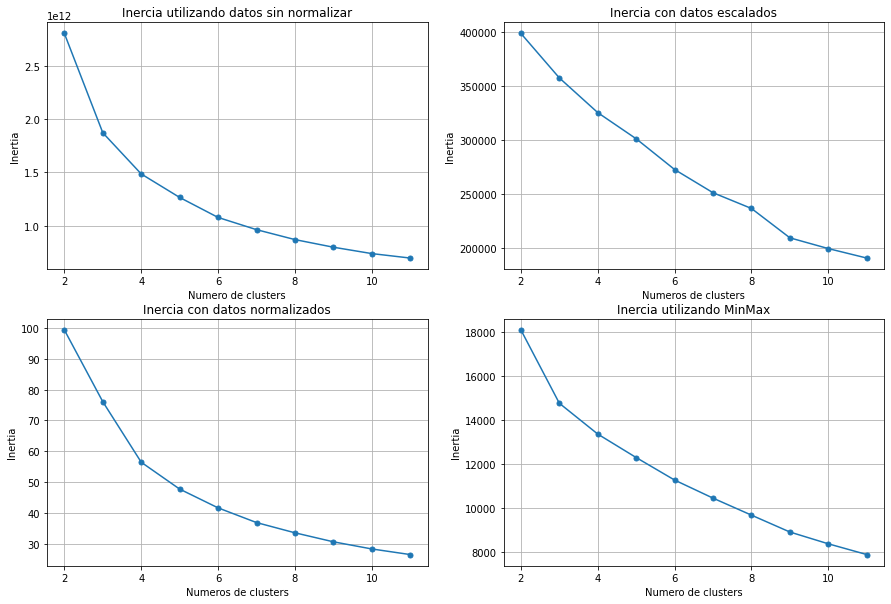

In [12]:

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(np.arange(2, 12), scores, '-o', markersize=5)
plt.xlabel('Numero de clusters')
plt.ylabel("Inertia")
plt.title("Inercia utilizando datos sin normalizar")
plt.grid(True)
plt.subplot(2,2,2)
plt.plot(np.arange(2, 12), scores1,'-o', markersize=5)
plt.xlabel('Numeros de clusters')
plt.ylabel("Inertia")
plt.title("Inercia con datos escalados")
plt.grid(True)
plt.subplot(2,2,3)
plt.plot(np.arange(2, 12), scores2,'-o', markersize=5)
plt.xlabel('Numeros de clusters')
plt.ylabel("Inertia")
plt.title("Inercia con datos normalizados")
plt.grid(True)
plt.subplot(2,2,4)
plt.plot(np.arange(2, 12), scores3,'-o', markersize=5)
plt.xlabel('Numero de clusters')
plt.ylabel("Inertia")
plt.title("Inercia utilizando MinMax")
plt.grid(True)

El método de elbow para los datos normalizados y crudos muestra que el número optimo de clusters es 4. Utilizando MinMaxScaler y StandarScaler no se puede apreciar un número optimo.

In [13]:

n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(dff_var)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  1485500489271.4463


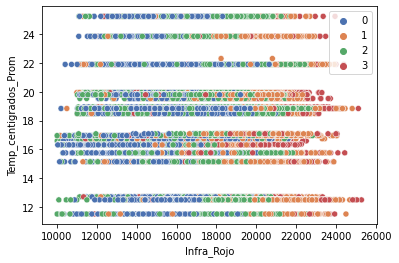

In [16]:
feature_1=feature_names[4]
feature_2=feature_names[10]

sns.scatterplot(data=dff_var, x=feature_1, y=feature_2, hue=clusters, palette='deep')

In [17]:
dff_result = dff_var
dff_result["cluster"] = km.predict(dff_result)
dff_result.head()

,Azul,Verde,Rojo,Borde_rojo,Infra_Rojo,Roya_porcentaje,Carbon_porcentaje,Adversidades,Fusariosis_otros,Manchas_Foliares_otros,Temp_centigrados_Prom,Presion_hPa_Prom,Temp_suelo_centigrados_Prom,Intende_Lluvia_mm_h,Vel_de_Viento_Km_h_Prom,Hum_porcentajeHR_Prom,Rafaga_de_Viento_km_h_Prom,cluster
0,54000,12090,52100,33080,17637,1,0,0.0,0,0,12.705,981.259,13.283,1.2,5.86,83.075,12.234,2
1,62100,15180,80000,43790,20404,1,0,0.0,0,0,12.705,981.259,13.283,1.2,5.86,83.075,12.234,3
2,65800,16270,77100,46000,21829,1,0,0.0,0,0,12.705,981.259,13.283,1.2,5.86,83.075,12.234,3
3,63800,15540,78500,46320,22299,1,0,0.0,0,0,12.705,981.259,13.283,1.2,5.86,83.075,12.234,3
4,54400,12940,59700,38510,19311,1,0,0.0,0,0,12.705,981.259,13.283,1.2,5.86,83.075,12.234,2


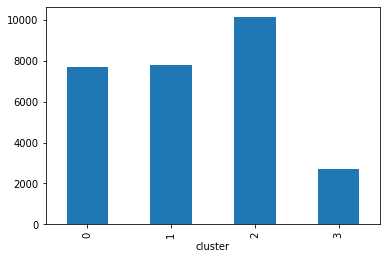

In [18]:
dff_result.groupby("cluster").cluster.count().plot(kind='bar', stacked=True)

# Silhouette

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np


For n_clusters = 2 The average silhouette_score is : 0.443612487246985
For n_clusters = 3 The average silhouette_score is : 0.37998229548477297
For n_clusters = 4 The average silhouette_score is : 0.33064663153224555
For n_clusters = 5 The average silhouette_score is : 0.3252513949113513
For n_clusters = 6 The average silhouette_score is : 0.30652198152732285


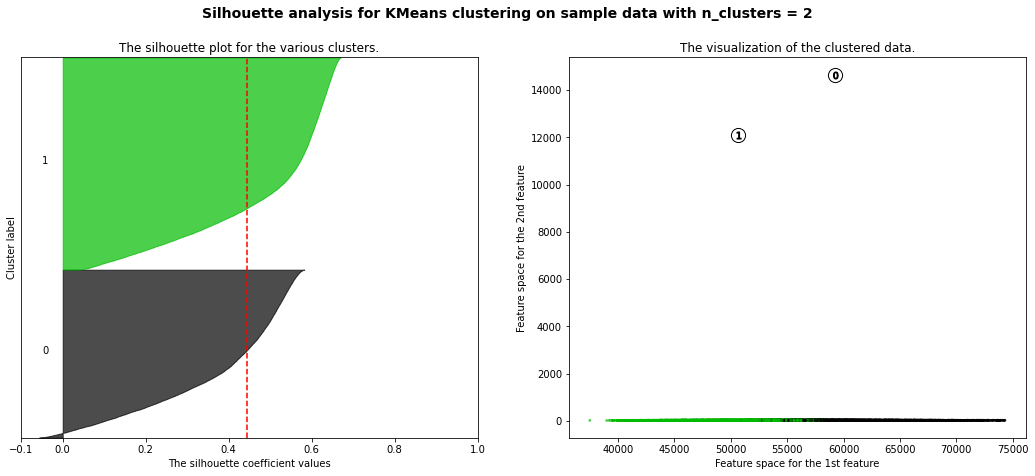

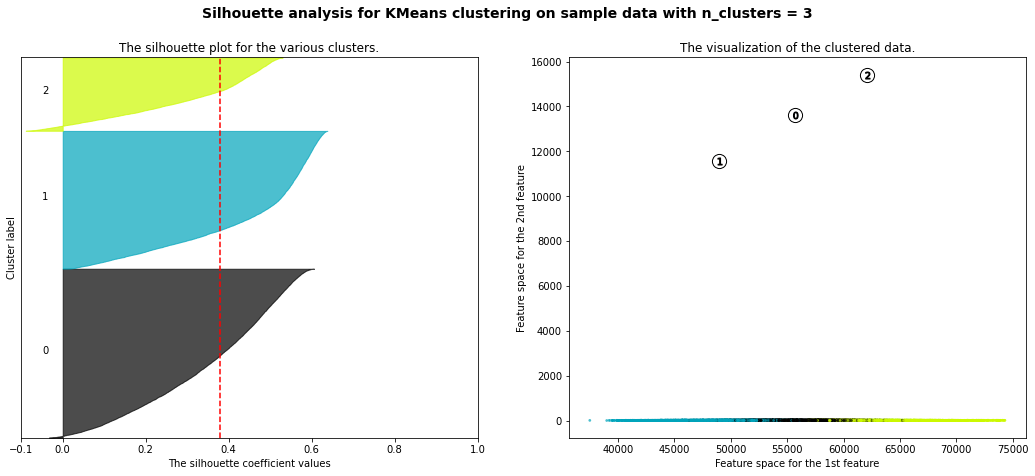

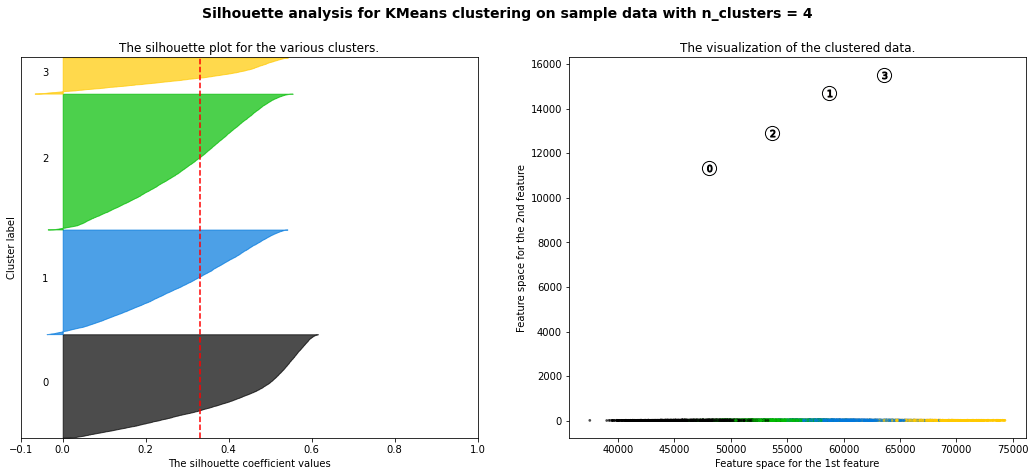

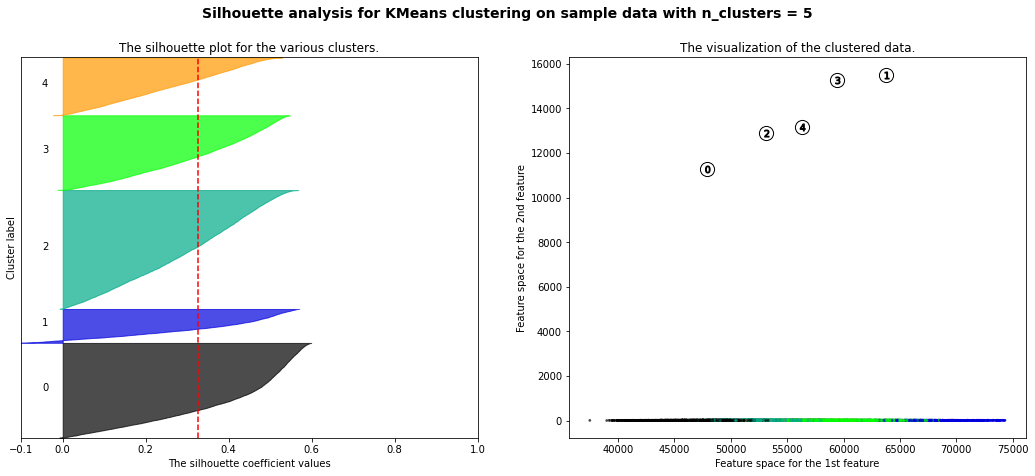

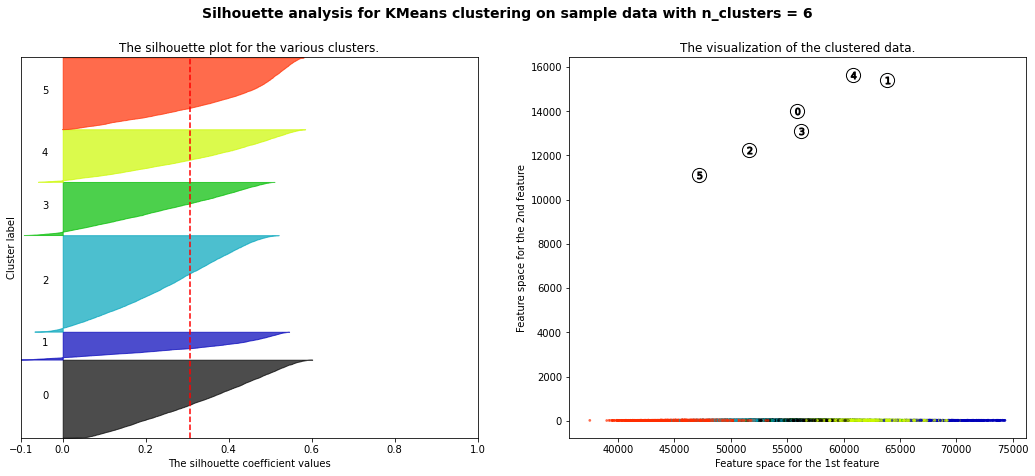

In [20]:

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dff_var) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dff_var)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dff_var, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dff_var, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dff_var.iloc[:, 0], dff_var.iloc[:, 10], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Es posible observar luego del análisis de siluetas que el valor medio del score aumenta junto al número de clusters.

## Meanshift

In [21]:
bandwidth = estimate_bandwidth(dff_var, quantile=0.48, n_samples=300)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(dff_var)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para MeanShift : %d" % n_clusters_)

Numero estimado de clusters para MeanShift : 1


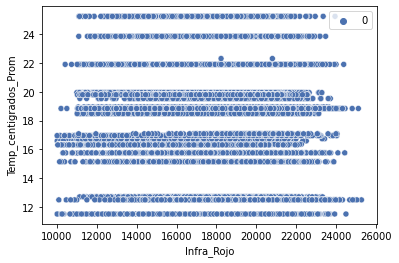

In [23]:
feature_1=feature_names[4]
feature_2=feature_names[10]

sns.scatterplot(data=dff_var, x=feature_1, y=feature_2, hue=clusters2, palette='deep')


## DBSCAN 

In [24]:
#revisar, probar otros valores
dbscan = DBSCAN(eps=0.015 ,min_samples=12, algorithm='brute' )
dbscan.fit(dff_var)
cluster3 = dbscan.labels_

labels_unique = np.unique(cluster3)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para DBSCAN : %d" % n_clusters_)

Numero estimado de clusters para DBSCAN : 1


## AgglomerativeClustering

In [25]:
n_clusters=4

ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', affinity='l1')
ward.fit(dff_var)
cluster4 = ward.labels_
labels_unique = np.unique(cluster4)
n_clusters_ = len(labels_unique)
print("Numero estimado de clusters para average : %d" % n_clusters_)

Numero estimado de clusters para average : 4


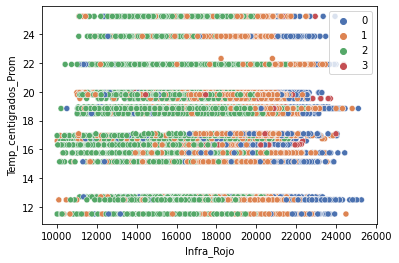

In [30]:
feature_1=feature_names[4]
feature_2=feature_names[10]

sns.scatterplot(data=dff_var, x=feature_1, y=feature_2, hue=cluster4, palette='deep')

##  GaussianMixture

In [31]:
gmm = GaussianMixture(n_components=4, covariance_type='full')
gmm.fit(dff_var)
pred = gmm.predict(dff_var)

Text(0.5, 1.0, 'Clusters segun GaussianMixture')

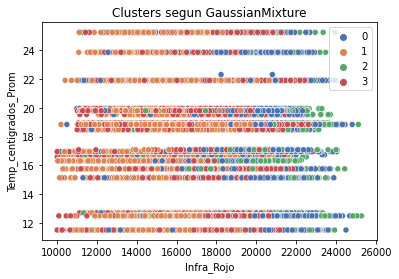

In [32]:
sns.scatterplot(data=dff_var, x=feature_1, y=feature_2, hue=pred, palette="deep")
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title("Clusters segun GaussianMixture")

In [ ]:
#model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
#model.fit(dff_var)
#clust_labels2 = model.predict(dff_var)
    
#cluster_centers_indices = model.cluster_centers_indices_
#labels = af.labels_

#n_clusters_ = len(cluster_centers_indices)

#NO FUNCIONA!!
